In [6]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 8.1 The Basics of Decision Trees

### 8.1.1 Regression Trees

In [8]:
hitters = pd.read_csv('../datasets/Hitters.csv')

In [9]:
hitters.head(10)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
6,-Al Newman,185,37,1,23,8,21,2,214,42,...,30,9,24,N,E,76,127,7,70.0,A
7,-Argenis Salazar,298,73,0,24,24,7,3,509,108,...,41,37,12,A,W,121,283,9,100.0,A
8,-Andres Thomas,323,81,6,26,32,8,2,341,86,...,32,34,8,N,W,143,290,19,75.0,N
9,-Andre Thornton,401,92,17,49,66,65,13,5206,1332,...,784,890,866,A,E,0,0,0,1100.0,A


In [10]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [12]:
hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [26]:
display(hitters.isnull().sum(axis=0))
#drop na
hitters.dropna(axis=0, inplace=True)

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [33]:
counts, bins = np.histogram(hitters['Salary'])

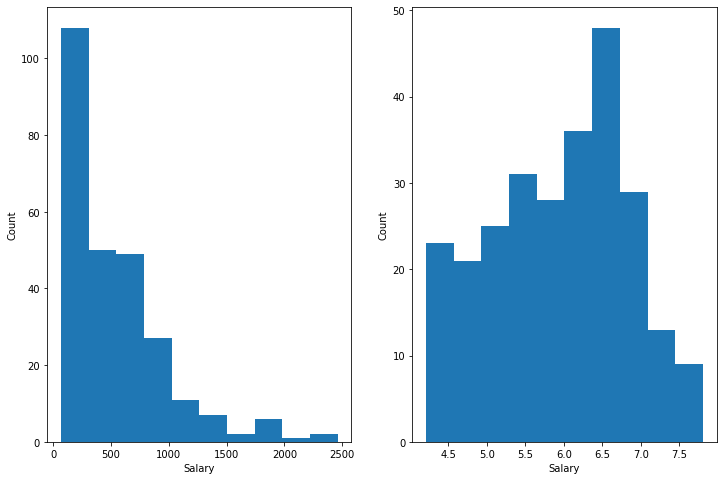

In [45]:
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(121)
ax1.hist(hitters['Salary'],density=0)
ax1.set(xlabel='Salary', ylabel='Count')
ax2 = plt.subplot(122)
ax2.hist(np.log(hitters['Salary']), density=0)
ax2.set(xlabel='Salary', ylabel='Count');

In [49]:
X = hitters[['Years', 'Hits']]
y = np.log(hitters['Salary'])

In [51]:
tree_reg = DecisionTreeRegressor(max_leaf_nodes=3)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=3,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

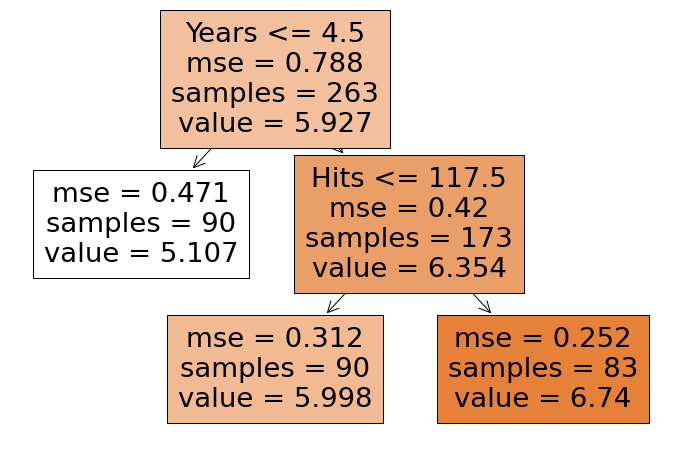

In [65]:
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, feature_names=X.columns.tolist(), filled=True)

In [97]:
from sklearn.tree import export_graphviz
import PIL
import io
from IPython.display import Image

In [95]:
import pydotplus
graph = pydotplus.graph_from_dot_data(export_graphviz(tree_reg, feature_names=X.columns.tolist(), filled=True))
graph.write_png('baseball_tree.png')

True

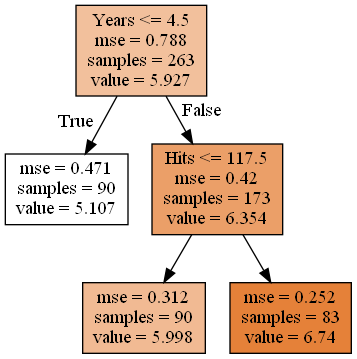

In [98]:
PIL.Image.open('baseball_tree.png')

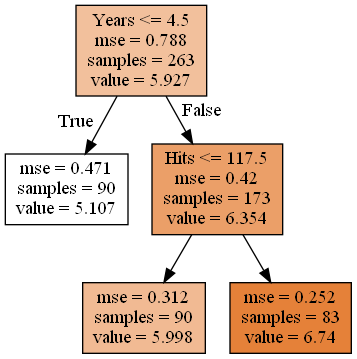

In [100]:
Image(graph.create_png())

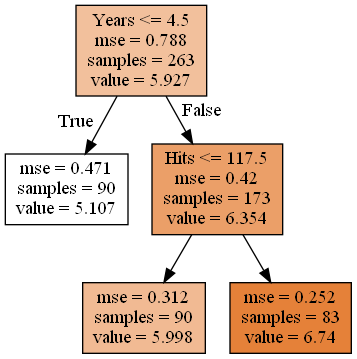

In [101]:
PIL.Image.open(io.BytesIO(graph.create_png()))